# Documentação

!pip install yfinance

### Artigo original:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Uso do Auto-ARIMA:
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [5]:
def get_finance_data(ticker, period='1y', interval='1d'):
    '''
    Função para capturar os dados dos ativos, acrescentar ".SA" no final do ticker para ativos 
    negociados na Bovespa, exemplo "PETR4.SA".
    Exemplo url base da API: https://query1.finance.yahoo.com/v7/finance/options/PETR4.SA?date=20201222
    Exemplo url scrape da API: https://finance.yahoo.com/quote/PETR4.SA
    
    Parameters
    ----------
    period: default '1y', periodos validos: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    inteval: default '1d', intervalos validos: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1d, 5d, 1wk, 1mo, 3mo.
    '''
    
    google = yf.Ticker(ticker)
    
    df = google.history(period=period, interval=interval)
#     df['date'] = pd.to_datetime(df.index).time
#     df.set_index('date', inplace=True)
    return df


def get_forecast(df, col_ref='Low'):
    # Assuming that we've properly trained the model before and that the 
    # hyperparameters are correctly tweaked, we use the full dataset to fit
    y = df[col_ref].values
    model = ARIMA(y, order=(7,1,2)).fit()
    forecast = model.forecast(steps=1)[0]

    # Returning the last real data and the forecast for the next minute
    return (y[len(y)-1], forecast)

In [ ]:
df = get_finance_data('HFOF11.SA')

get_forecast(df, col_ref='Close')

In [ ]:
df.tail()

In [ ]:
df['Close'][-1]

In [ ]:
ativo = yf.Ticker('HFOF11.SA')

In [ ]:
ativo.get_dividends()

### Tentando fazer auto arima

In [ ]:
! pip install pmdarima


In [1]:
from pmdarima.arima import auto_arima

In [8]:
df = get_finance_data('BBFI11B.SA')

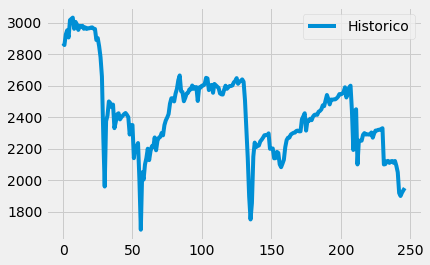

In [9]:
y = df['Low'].values
plt.plot(range(0,len(y)),y, label='Historico')
plt.legend()
plt.show()

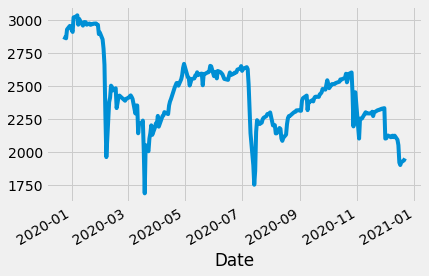

In [10]:
df['Low'].plot(label='Historico')

In [11]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df['Low'])

(0.3927149584257077, True)

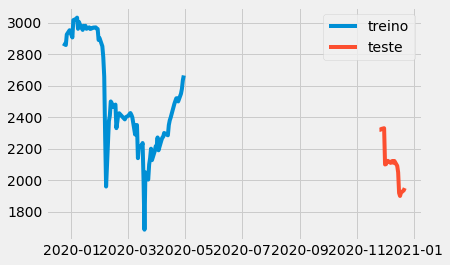

In [16]:
train = df['Low'][:85]
test = df['Low'][-20:]
plt.plot(train, label='treino')
plt.plot(test, label='teste')
plt.legend()
plt.show()

In [13]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, mas_d=5, max_q=5, start_P=0, D=1, start_Q=1, max_P=5, 
                         max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, suppress_warnings=True, 
                         stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=936.823, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=926.358, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=938.471, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=917.281, Time=0.38 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=915.488, Time=0.77 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=2.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=4.87 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=913.506, Time=0.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=915.393, Time=0.29 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=1.98 sec

In [14]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   85
Model:             SARIMAX(0, 1, 0)x(4, 1, [1], 12)   Log Likelihood                -443.343
Date:                              Tue, 22 Dec 2020   AIC                            898.686
Time:                                      22:38:55   BIC                            912.346
Sample:                                           0   HQIC                           904.124
                                               - 85                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8342      0.178     -4.687      0.000      -1.183      -0.485
ar.S.L24      -0.8050      0.178     -4.516      0.000      -1.154      -0.456
ar.S.L36      -0.8370      0.132     -6.328      0.000      -1.096      -0.578
ar.S.L48      -0.8375      0.090     -9.313      0.000      -1.014      -0.661
ma.S.L12      -0.3994      0.704     -0.568      0.570      -1.778       0.979
sigma2      4201.8545   2162.460      1.943      0.052     -36.490    8440.199
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 5.86
Prob(Q):                              0.35   Prob(JB):                         0.05
Heteroskedasticity (H):               0.94   Skew:                            -0.40
Prob(H) (two-sided):                  0.88   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
prd = pd.DataFrame(arima_model.predict(n_periods=20), index=test.index)
prd.columns = ['Low']
prd

,Low
Date,
2020-11-25,2653.929899
2020-11-26,2617.471108
2020-11-27,2551.557830
2020-11-30,2439.229369
2020-12-01,2112.891199
2020-12-02,1843.726801
2020-12-03,2197.107574
2020-12-04,2224.163135
2020-12-07,2289.421412


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train, label="treino")
plt.plot(test, label="teste")
plt.plot(prd, label="predicao")
plt.legend(loc='upper right')
plt.show